In [3]:
!pip install plotnine

     ---------------------------------------- 1.2/1.2 MB 314.3 kB/s eta 0:00:00
     -------------------------------------- 64.7/64.7 kB 698.0 kB/s eta 0:00:00
     ------------------------------------ 233.8/233.8 kB 714.4 kB/s eta 0:00:00
     -------------------------------------- 39.9/39.9 MB 561.9 kB/s eta 0:00:00
     ---------------------------------------- 9.0/9.0 MB 485.5 kB/s eta 0:00:00
     ------------------------------------ 111.8/111.8 kB 812.8 kB/s eta 0:00:00
     ------------------------------------ 338.8/338.8 kB 750.1 kB/s eta 0:00:00


In [1]:
from plotnine import *
from plotnine.data import *

import numpy as np
import pandas as pd

import warnings
import os

## ДатаФрейм

In [2]:
df = mpg

In [3]:
df.head(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### Постройте два графика: в одном из них одна из осей должна быть соответствовать столбцу с элементами-категориями, во втором – обе (например, "class" и "drv")

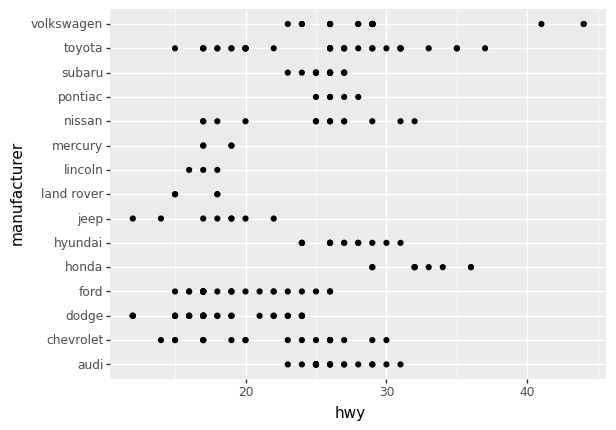

<ggplot: (134908562389)>

In [4]:
ggplot(data=df) + geom_point(mapping=aes(y=df['manufacturer'], x=df['hwy']))

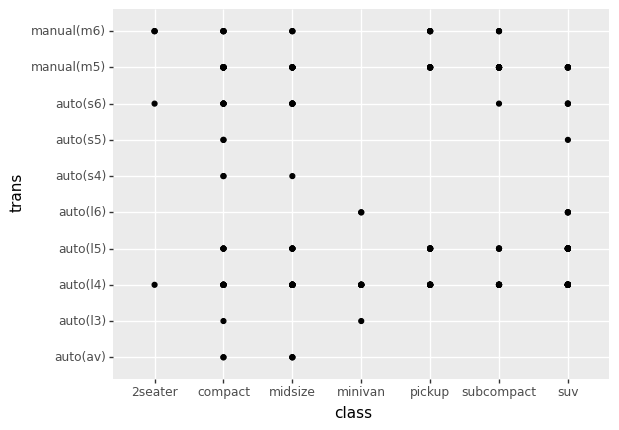

<ggplot: (134908610185)>

In [5]:
ggplot(data=df) + geom_point(mapping=aes(y=df['trans'], x=df['class']))

### Попробуйте сделать два графика: в одном размер точек будет соответствовать столбцу с элементами-категориями, во втором – столбцу с элементами-значениями

In [6]:
#По элементам-категориям

D:\Python311\Lib\site-packages\plotnine\scales\scale_size.py:48: PlotnineWarning: Using size for a discrete variable is not advised.


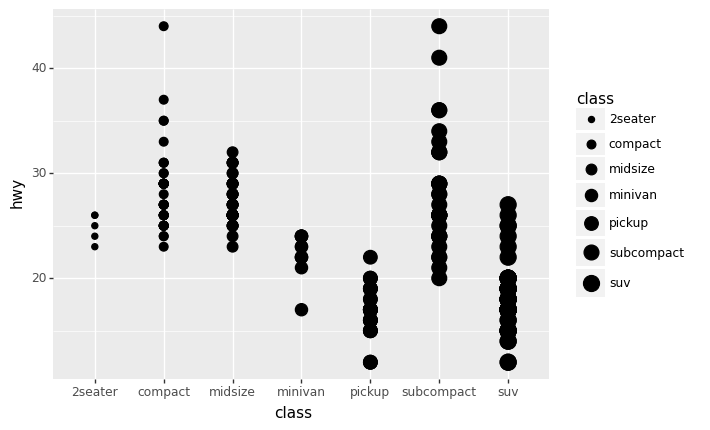

<ggplot: (134908694185)>

In [7]:
ggplot(data=df) + geom_point(mapping=aes(y=df['hwy'], x=df['class'], size=df['class']))

In [8]:
#По элементам значениям

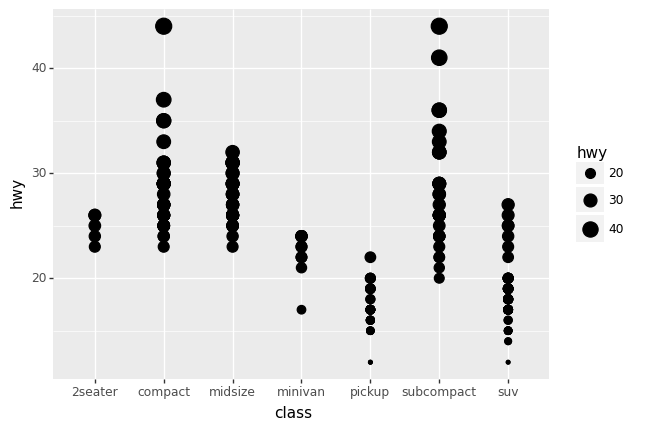

<ggplot: (134908736473)>

In [9]:
ggplot(data=df) + geom_point(mapping=aes(y=df['hwy'], x=df['class'], size=df['hwy']))

### А что если сделать использовать в качестве источника визуального свойства "форма" непрерывную категорию (например hwy)?

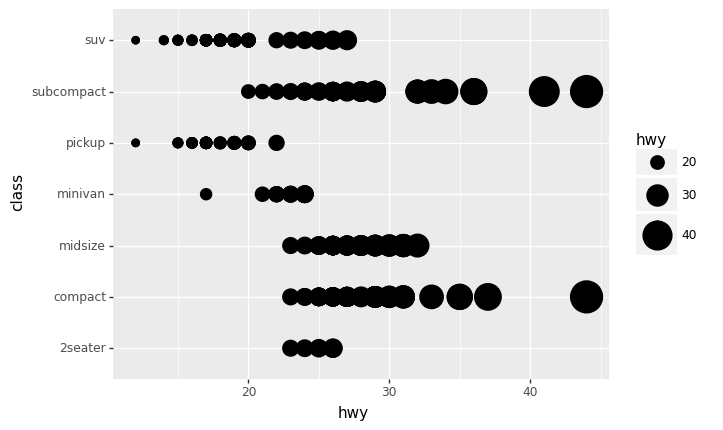

<ggplot: (134908876513)>

In [10]:
ggplot(data=df) + geom_point(mapping=aes(x=df['hwy'], y=df['class'], stroke='hwy'))

### Попробуйте сделать график с визуальным элементом, заданным условным оператором (например, color="displ < 5")

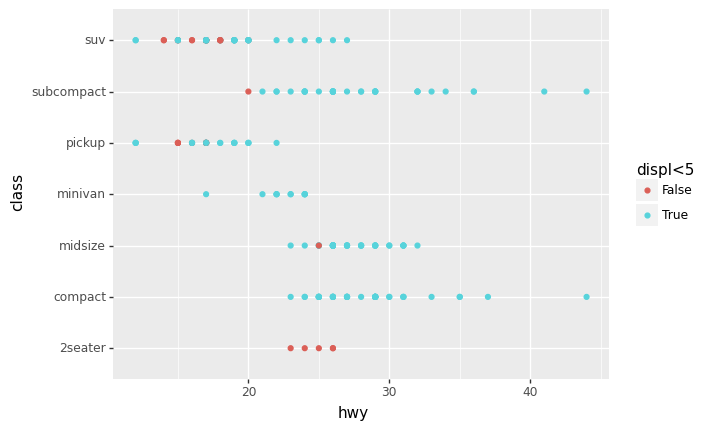

<ggplot: (134908890237)>

In [11]:
ggplot(data=df) +\
geom_point(mapping=aes(x=df['hwy'], y=df['class'], color='displ<5'))

### Попробуйте поэкспериментировать с графиками, где одной категории соответствуют различные визуальные элементы (пример ниже). Попробуйте привести пример, когда это имеет смысл.

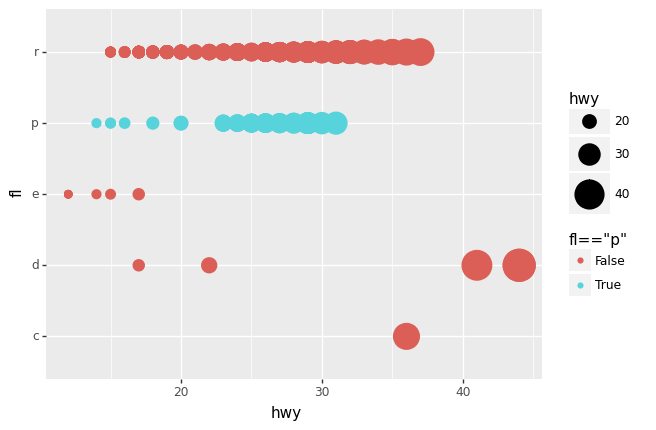

<ggplot: (134909119437)>

In [12]:
ggplot(data=df) + geom_point(mapping=aes(y=df['fl'], x=df['hwy'], stroke='hwy', color='fl=="p"'))

### Что если использовать категорию с непрерывными значениями (например, hwy) для разделения на панели?

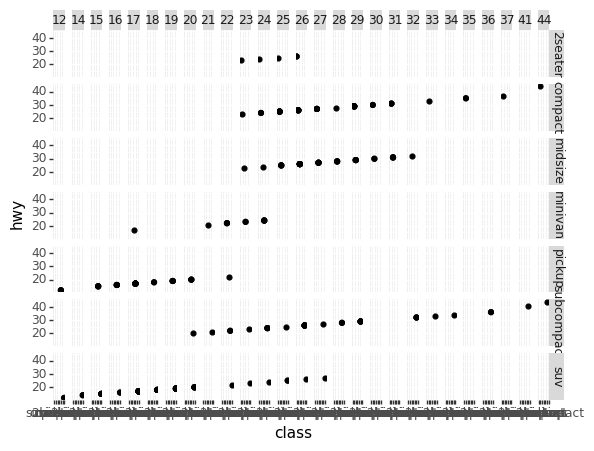

<ggplot: (135005171185)>

In [13]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="class", y="hwy")) +\
facet_grid("class ~ hwy")

### Можно сделать только вертикальные или только горизонтальные панели, если использовать конструкцию типа (". ~ <категория>")

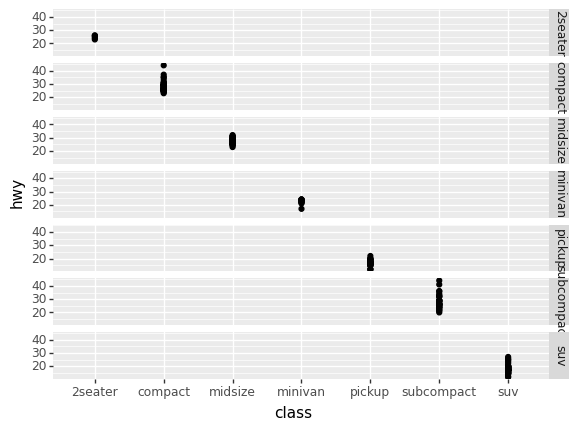

<ggplot: (134917656613)>

In [14]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="class", y="hwy")) +\
facet_grid("class ~ .")

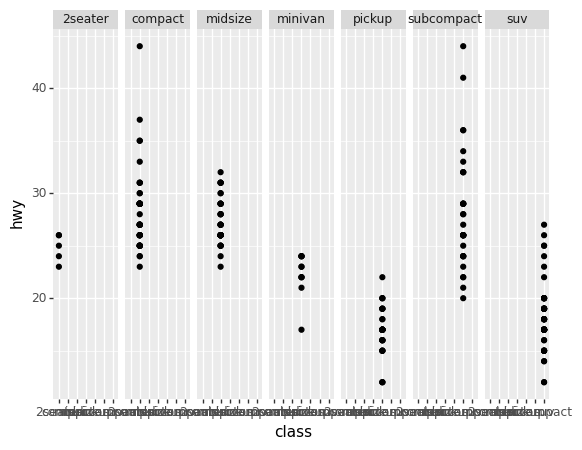

<ggplot: (134917887353)>

In [15]:
ggplot(data=mpg) +\
geom_point(mapping=aes(x="class", y="hwy")) +\
facet_grid(". ~ class")

D:\Python311\Lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


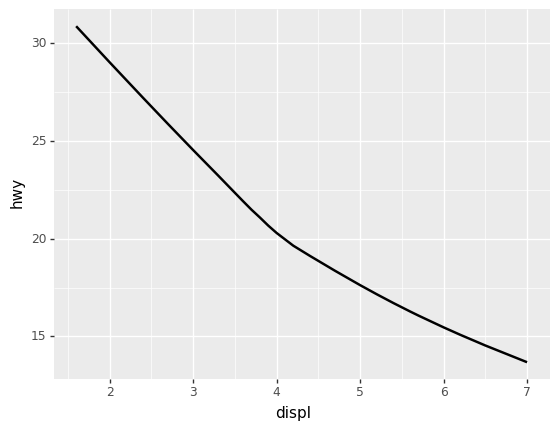

<ggplot: (134917441565)>

In [16]:
ggplot(data=mpg) +\
geom_smooth(mapping=aes(x="displ", y="hwy"))

### Попробуйте скомбинировать разные свойства разных слоёв

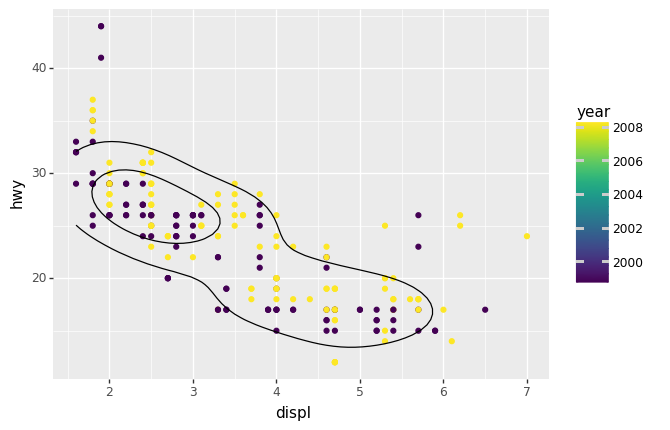

<ggplot: (134917945145)>

In [17]:
ggplot(data=mpg, mapping=aes(x="displ", y="hwy")) +\
geom_point(mapping=aes(color="year")) +\
geom_density_2d()

### Какое геометрическое отображение вы будете использовать, чтобы нарисовать линейную диаграмму (обычный линейный график)?

In [18]:
df.head(2)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact


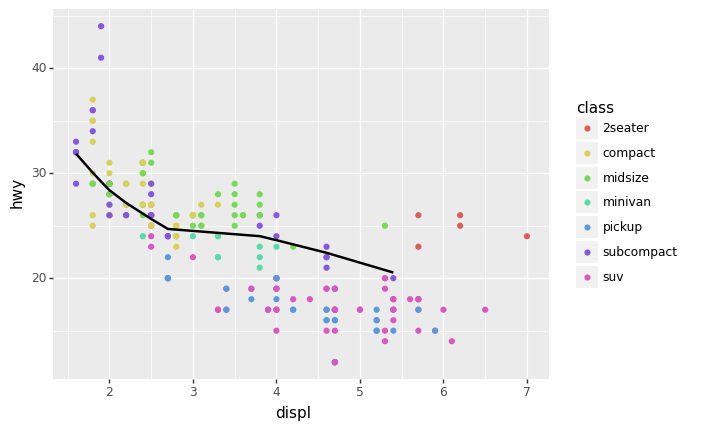

<ggplot: (134917936917)>

In [19]:
ggplot(data=mpg, mapping=aes(x="displ", y="hwy")) +\
geom_point(mapping=aes(color="class")) +\
geom_smooth(data=mpg.loc[mpg["class"] == "subcompact"], se=False)

### Подберите подходящий код под следующие графики:

##### 1

D:\Python311\Lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


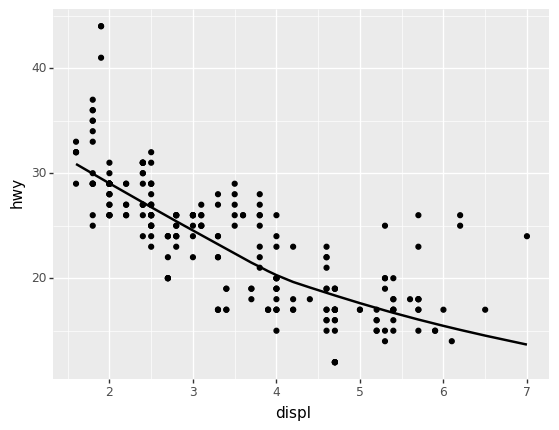

<ggplot: (134922395265)>

In [46]:
ggplot(data=df) +\
geom_point(mapping=aes(x='displ', y='hwy')) +\
geom_smooth(mapping=aes(x='displ', y='hwy'))

##### 2

D:\Python311\Lib\site-packages\plotnine\scales\scale_alpha.py:68: PlotnineWarning: Using alpha for a discrete variable is not advised.
D:\Python311\Lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
D:\Python311\Lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
D:\Python311\Lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


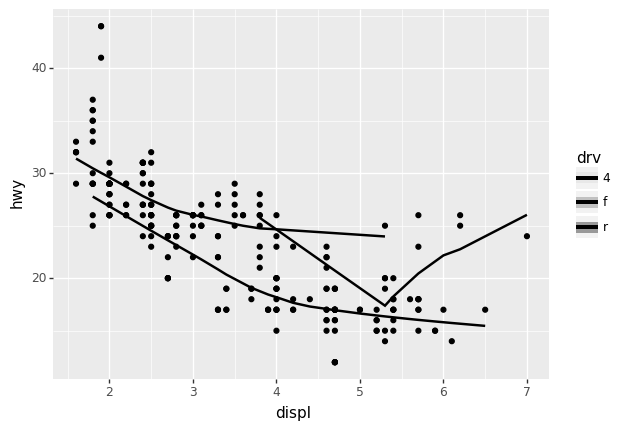

<ggplot: (134922480513)>

In [47]:
ggplot(data=df, mapping=aes(x='displ', y='hwy')) +\
geom_point() +\
geom_smooth(data=df, mapping=aes(alpha='drv'))

##### 3

D:\Python311\Lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
D:\Python311\Lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
D:\Python311\Lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


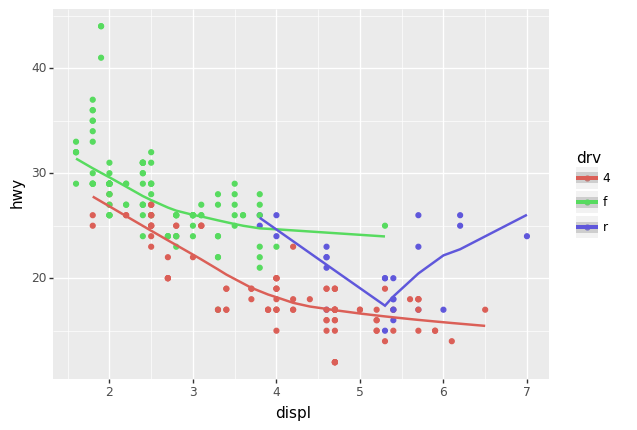

<ggplot: (134922443193)>

In [48]:
ggplot(data=df, mapping=aes(x='displ', y='hwy')) +\
geom_point(mapping=aes(color=('drv'))) +\
geom_smooth(mapping=aes(color='drv'))

##### 5

D:\Python311\Lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


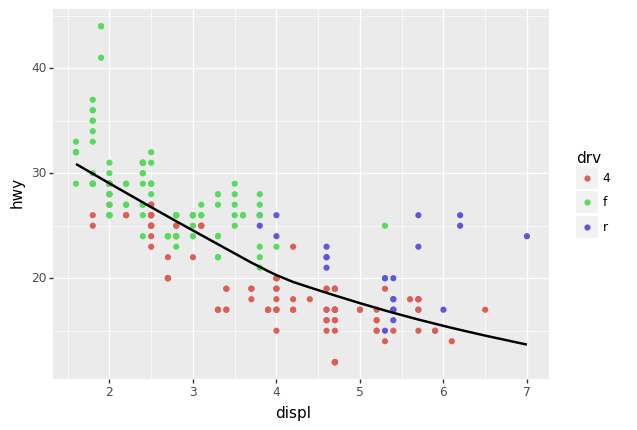

<ggplot: (134922327725)>

In [49]:
ggplot(data=df, mapping=aes(x='displ', y='hwy')) +\
geom_point(mapping=aes(color='drv')) +\
geom_smooth(mapping=aes(x='displ', y='hwy'))

##### 6 

D:\Python311\Lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
D:\Python311\Lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
D:\Python311\Lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


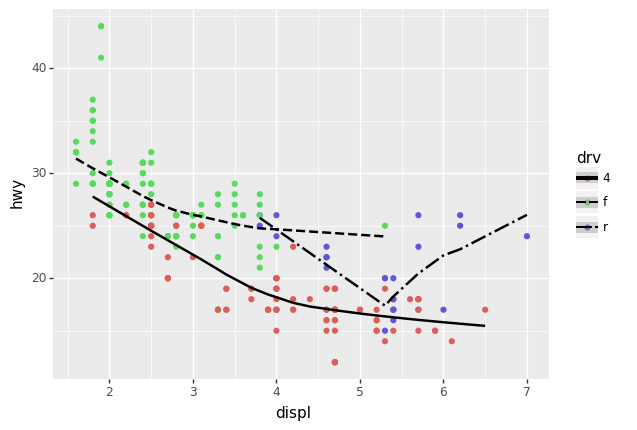

<ggplot: (147174616613)>

In [219]:
ggplot(data=df, mapping=aes(x='displ', y='hwy')) +\
geom_point(mapping=aes(color='drv')) +\
geom_smooth(mapping=aes(linetype='drv'))

##### 7 

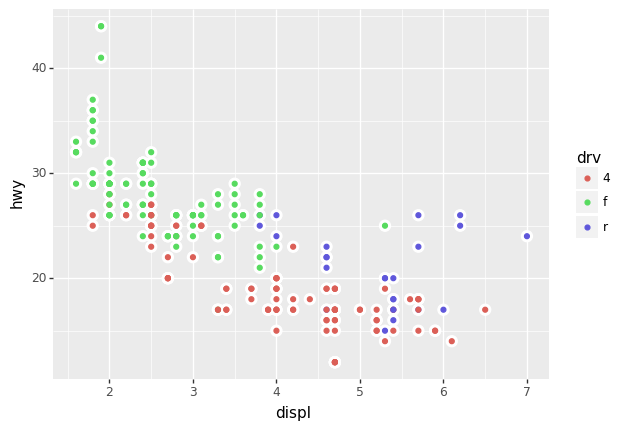

<ggplot: (147190895401)>

In [243]:
ggplot(data=df, mapping=aes(x='displ', y='hwy')) +\
geom_point(color='white', size=4) +\
geom_point(mapping=aes(color='drv'))

### Что делает geom_col()? Чем он отличается от geom_bar()?

##### Ответ: geom_col позволяет сопоставить значения в разрезе одной категории сопоставляет высоту столбцов

### ### Что произойдёт, если 
'ggplot(data=diamonds) +\
'geom_bar(mapping=aes(x="cut", y="..prop.."), group=1)
или
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut", fill="color", y="..prop.."))
### запустить без "group=1"? Почему?

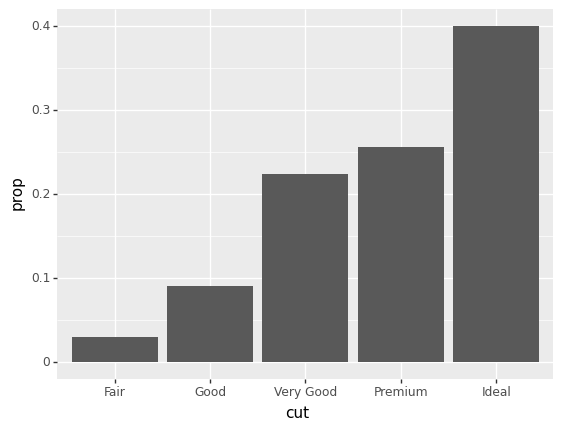

<ggplot: (147180620593)>

In [292]:
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut", y="..prop..", fill="color"), group=1) 

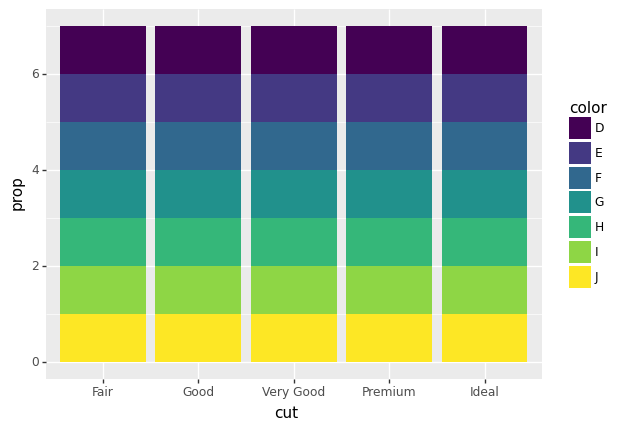

<ggplot: (147180504217)>

In [293]:
ggplot(data=diamonds) +\
geom_bar(mapping=aes(x="cut", y="..prop..", fill="color")) 

##### Ответ: столбцы группируются по оси-Х

### Зачем тут coord_fixed()? Что делает geom_abline()?

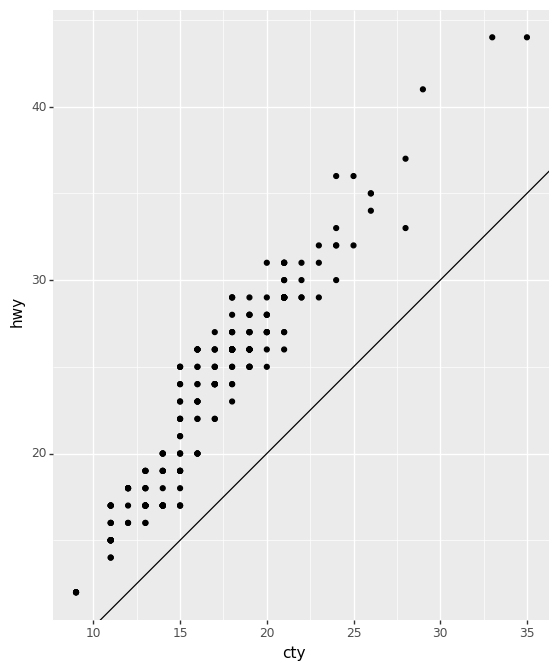

<ggplot: (147174822321)>

In [299]:
ggplot(data=mpg, mapping=aes(x="cty", y="hwy")) +\
geom_point() +\
geom_abline() +\
coord_fixed()

### coord_fixed() - фиксирует соотношение между масштабами x и y
### geom_abline() - линия, заданные наклоном, которые показывают направление отношения 

# Творческое задание
### Попробуйте использовать изученные средства plotnine для своего датасета (необязательно много и пока не надо строить сложные графики)

In [56]:
diamonds.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


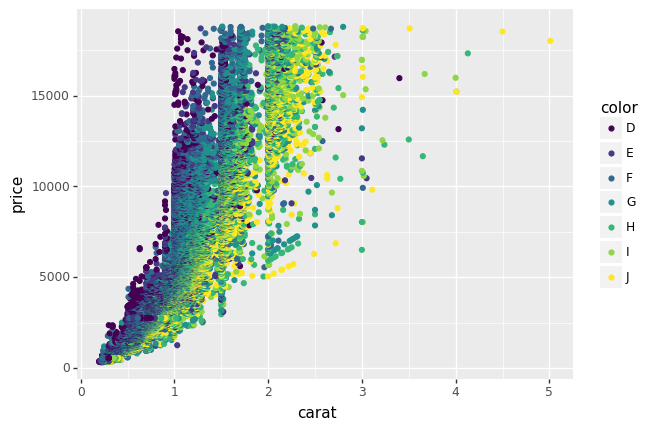

<ggplot: (134914291677)>

In [55]:
ggplot(diamonds) +\
geom_point(mapping=aes(x='carat', y='price', color='color'))

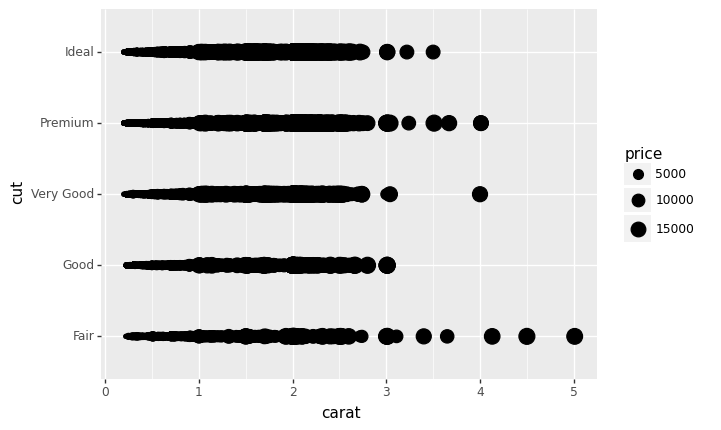

<ggplot: (134922491301)>

In [59]:
ggplot(diamonds) +\
geom_point(mapping=aes(x='carat', y='cut', size='price'))

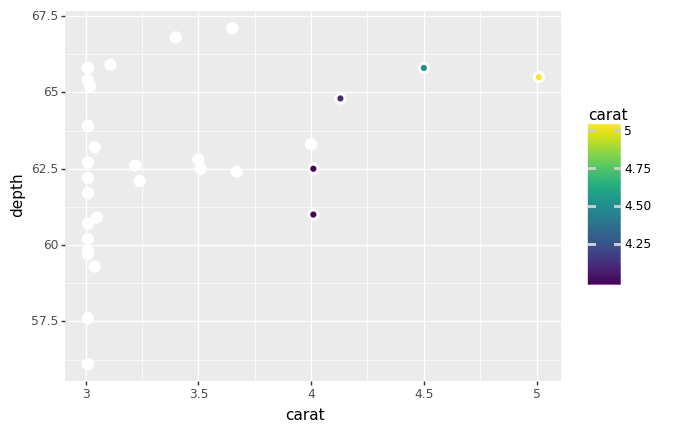

<ggplot: (134930845313)>

In [104]:
ggplot(diamonds) +\
geom_point(data=diamonds[diamonds['carat']>3], mapping=aes(x='carat', y='depth'), color='white', size=4) +\
geom_point(data=diamonds[diamonds['carat']>4], mapping=aes(x='carat', y='depth', color='carat'))